In [3]:
import argparse
import numpy as np
import tensorflow.compat.v2 as tf
import yaml
#from absl import app
from matplotlib import pyplot as plt, patches
#from nam_train import FLAGS
#from neural_additive_models import graph_builder, data_utils
tf.enable_v2_behavior()
import os.path as osp
import tensorflow as tf
from textwrap import wrap
import joblib
import shap

In [4]:
label_file = 'potec_feature_names.yaml'
with open(label_file, 'r') as file:
    features_name_potec = yaml.safe_load(file)
xlabel = 'Feature contribution'

## BQ correct

In [3]:
postfix = '_all_bq_correct.joblib'

In [4]:
feature_names = joblib.load('feature_names' + postfix)
test_x = joblib.load('test_x' + postfix) 
test_feature_importances = joblib.load('test_feature_importances' + postfix)

tmp_feature_names = []
for i in range(len(feature_names)):
    if features_name_potec[feature_names[i]] != '':
        tmp_feature_names.append(features_name_potec[feature_names[i]])
    else:
        tmp_feature_names.append(feature_names[i])
feature_names = np.array(tmp_feature_names)

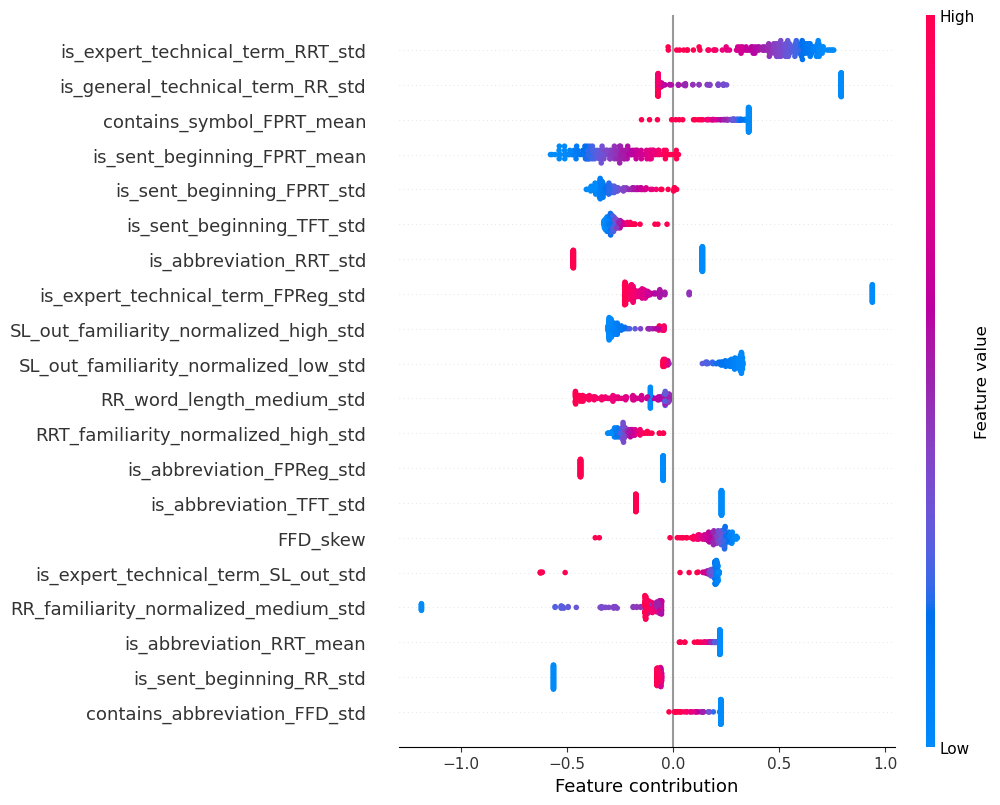

In [5]:
num_features = 20
use_feature_ids = np.argsort(np.sum(np.abs(np.transpose(test_feature_importances)), axis=0))[::-1][0:num_features]
explainer = shap.Explanation(values = np.transpose(test_feature_importances)[:,use_feature_ids], base_values=None, 
                           data=test_x[:,use_feature_ids],
                           display_data=None, instance_names=None, 
                           feature_names=feature_names[use_feature_ids], output_names=None, 
                           output_indexes=None, lower_bounds=None, upper_bounds=None, error_std=None, 
                           main_effects=None, hierarchical_values=None, clustering=None, compute_time=None)
shap.plots.beeswarm(explainer, max_display=num_features, show=False)
plt.xlabel(xlabel)
plt.savefig('plots/overall_feature_importance' + postfix.replace('.joblib','') + '_' + str(num_features) + '.pdf', dpi=300, bbox_inches='tight')

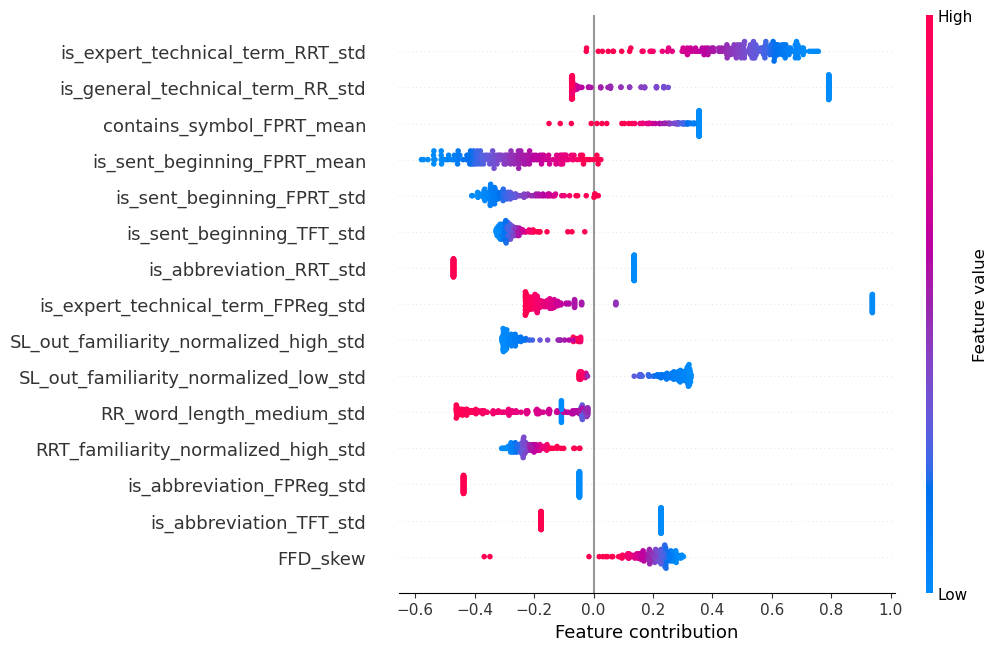

In [6]:
num_features = 15
use_feature_ids = np.argsort(np.sum(np.abs(np.transpose(test_feature_importances)), axis=0))[::-1][0:num_features]
explainer = shap.Explanation(values = np.transpose(test_feature_importances)[:,use_feature_ids], base_values=None, 
                           data=test_x[:,use_feature_ids],
                           display_data=None, instance_names=None, 
                           feature_names=feature_names[use_feature_ids], output_names=None, 
                           output_indexes=None, lower_bounds=None, upper_bounds=None, error_std=None, 
                           main_effects=None, hierarchical_values=None, clustering=None, compute_time=None)
shap.plots.beeswarm(explainer, max_display=num_features, show=False)
plt.xlabel(xlabel)
plt.savefig('plots/overall_feature_importance' + postfix.replace('.joblib','') + '_' + str(num_features) + '.pdf', dpi=300, bbox_inches='tight')

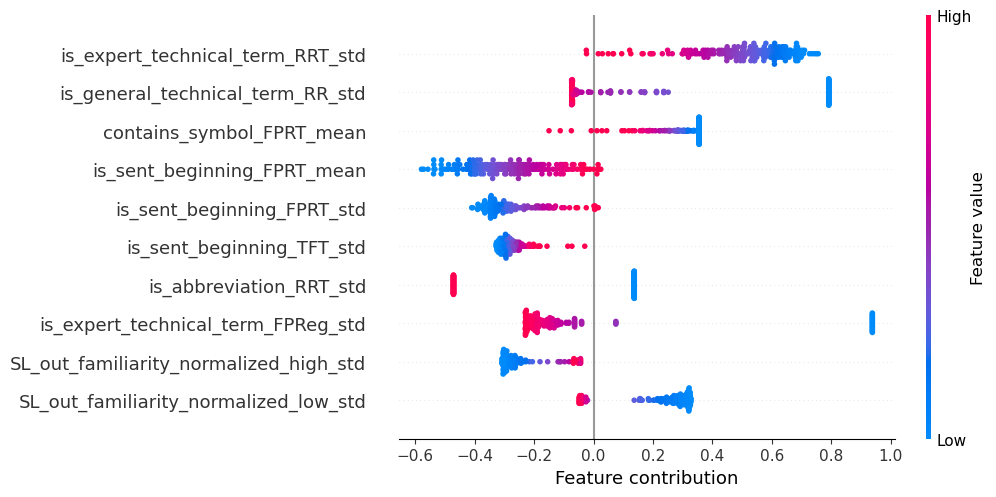

In [7]:
num_features = 10
use_feature_ids = np.argsort(np.sum(np.abs(np.transpose(test_feature_importances)), axis=0))[::-1][0:num_features]
explainer = shap.Explanation(values = np.transpose(test_feature_importances)[:,use_feature_ids], base_values=None, 
                           data=test_x[:,use_feature_ids],
                           display_data=None, instance_names=None, 
                           feature_names=feature_names[use_feature_ids], output_names=None, 
                           output_indexes=None, lower_bounds=None, upper_bounds=None, error_std=None, 
                           main_effects=None, hierarchical_values=None, clustering=None, compute_time=None)
shap.plots.beeswarm(explainer, max_display=num_features, show=False)
plt.xlabel(xlabel)
plt.savefig('plots/overall_feature_importance' + postfix.replace('.joblib','') + '_' + str(num_features) + '.pdf', dpi=300, bbox_inches='tight')

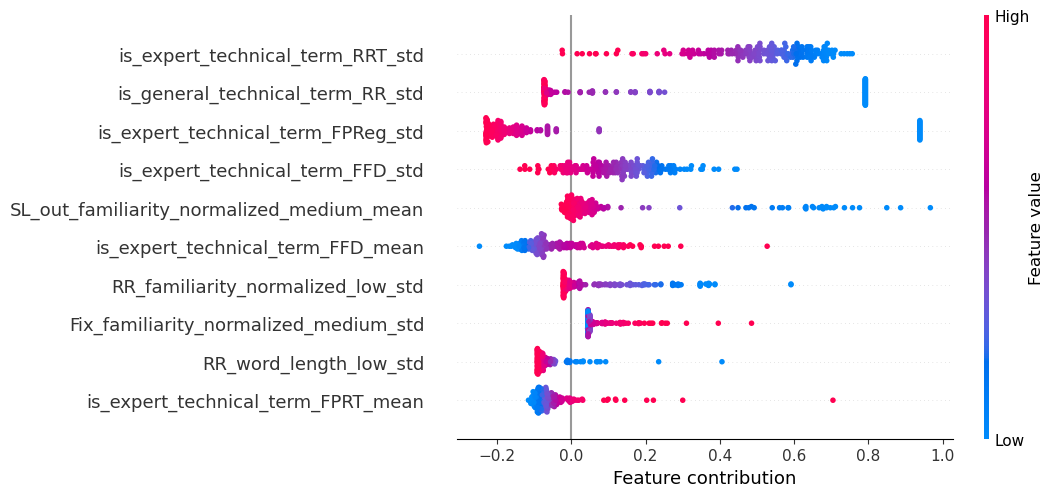

In [8]:
feature_importances_zero = np.transpose(test_feature_importances).copy()
feature_importances = np.transpose(test_feature_importances).copy()
zero_ids = np.where(feature_importances_zero < 0)
feature_importances_zero[zero_ids] = 0
use_feature_ids = np.argsort(np.max(np.abs(feature_importances_zero), axis=0))[::-1][0:num_features]
explainer = shap.Explanation(values = feature_importances[:,use_feature_ids], base_values=None, 
                           data=test_x[:,use_feature_ids],
                           display_data=None, instance_names=None, 
                           feature_names=feature_names[use_feature_ids], output_names=None, 
                           output_indexes=None, lower_bounds=None, upper_bounds=None, error_std=None, 
                           main_effects=None, hierarchical_values=None, clustering=None, compute_time=None)
shap.plots.beeswarm(explainer, max_display=num_features, show=False)
plt.xlabel(xlabel)
plt.savefig('plots/negative_feature_importance' + postfix.replace('.joblib','') + '.pdf', dpi=300, bbox_inches='tight')

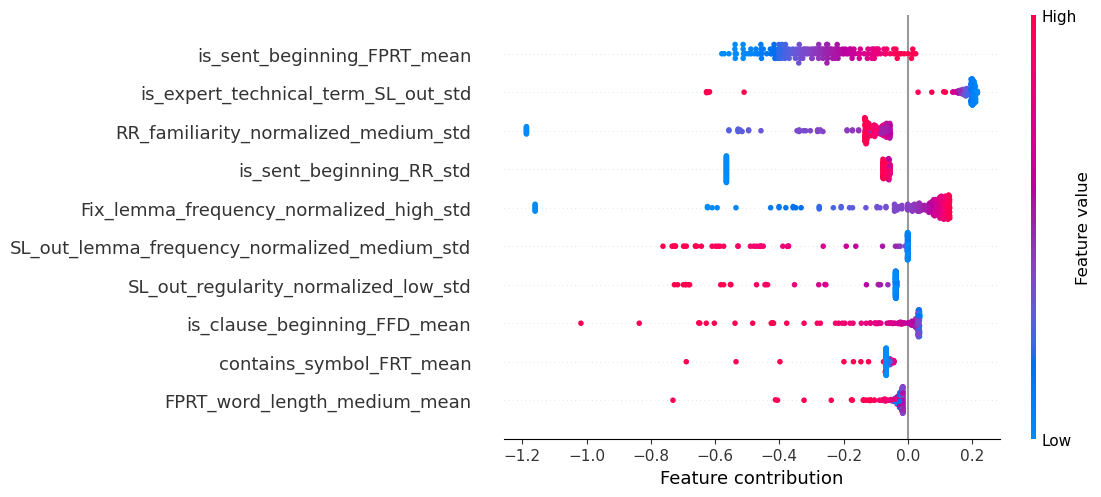

In [9]:
feature_importances_zero = np.transpose(test_feature_importances).copy()
feature_importances = np.transpose(test_feature_importances).copy()
zero_ids = np.where(feature_importances_zero > 0)
feature_importances_zero[zero_ids] = 0
use_feature_ids = np.argsort(np.max(np.abs(feature_importances_zero), axis=0))[::-1][0:num_features]
explainer = shap.Explanation(values = feature_importances[:,use_feature_ids], base_values=None, 
                           data=test_x[:,use_feature_ids],
                           display_data=None, instance_names=None, 
                           feature_names=feature_names[use_feature_ids], output_names=None, 
                           output_indexes=None, lower_bounds=None, upper_bounds=None, error_std=None, 
                           main_effects=None, hierarchical_values=None, clustering=None, compute_time=None)
shap.plots.beeswarm(explainer, max_display=num_features, show=False)
plt.xlabel(xlabel)
plt.savefig('plots/positive_feature_importance' + postfix.replace('.joblib','') + '.pdf', dpi=300, bbox_inches='tight')

## Text comprehension

In [5]:
postfix = '_all_tq_correct.joblib'

In [6]:
feature_names = joblib.load('feature_names' + postfix)
test_x = joblib.load('test_x' + postfix) 
test_feature_importances = joblib.load('test_feature_importances' + postfix)

tmp_feature_names = []
for i in range(len(feature_names)):
    if features_name_potec[feature_names[i]] != '':
        tmp_feature_names.append(features_name_potec[feature_names[i]])
    else:
        tmp_feature_names.append(feature_names[i])
feature_names = np.array(tmp_feature_names)

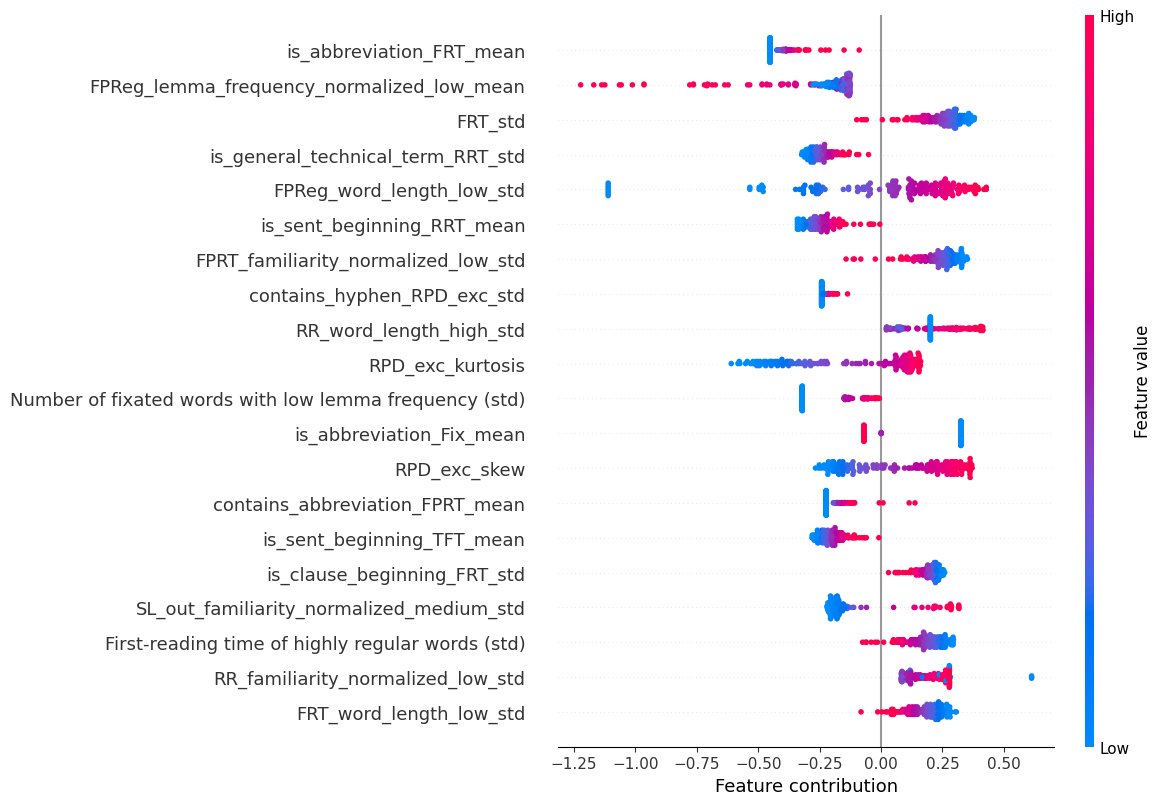

In [7]:
num_features = 20
use_feature_ids = np.argsort(np.sum(np.abs(np.transpose(test_feature_importances)), axis=0))[::-1][0:num_features]
explainer = shap.Explanation(values = np.transpose(test_feature_importances)[:,use_feature_ids], base_values=None, 
                           data=test_x[:,use_feature_ids],
                           display_data=None, instance_names=None, 
                           feature_names=feature_names[use_feature_ids], output_names=None, 
                           output_indexes=None, lower_bounds=None, upper_bounds=None, error_std=None, 
                           main_effects=None, hierarchical_values=None, clustering=None, compute_time=None)
shap.plots.beeswarm(explainer, max_display=num_features, show=False)
plt.xlabel(xlabel)
plt.savefig('plots/overall_feature_importance' + postfix.replace('.joblib','') + '_' + str(num_features) + '.pdf', dpi=300, bbox_inches='tight')

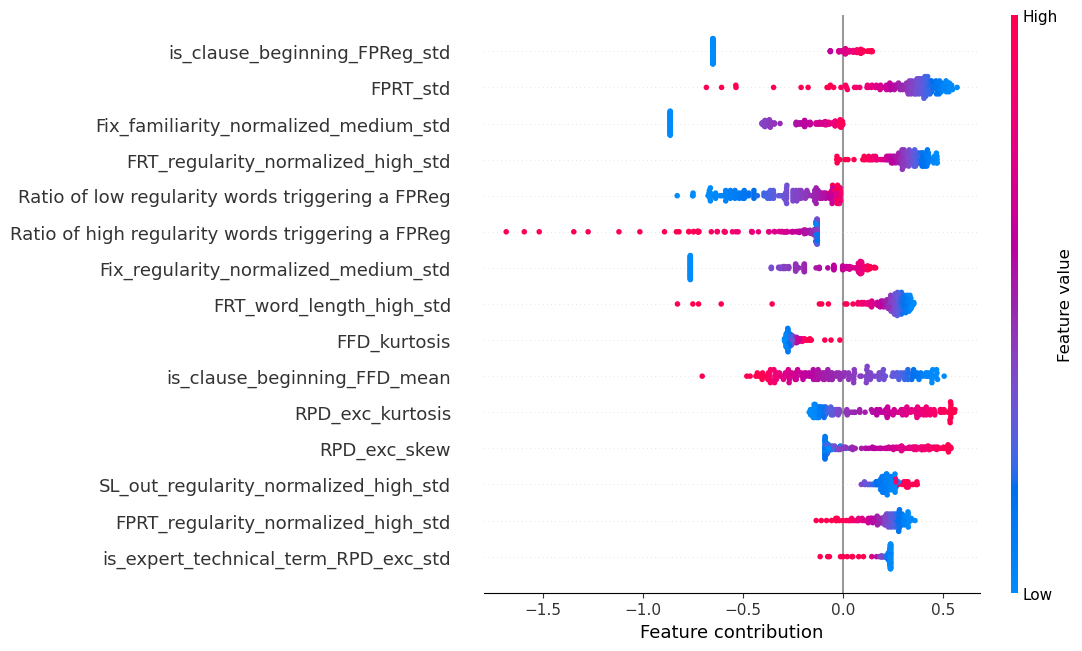

In [13]:
num_features = 15
use_feature_ids = np.argsort(np.sum(np.abs(np.transpose(test_feature_importances)), axis=0))[::-1][0:num_features]
explainer = shap.Explanation(values = np.transpose(test_feature_importances)[:,use_feature_ids], base_values=None, 
                           data=test_x[:,use_feature_ids],
                           display_data=None, instance_names=None, 
                           feature_names=feature_names[use_feature_ids], output_names=None, 
                           output_indexes=None, lower_bounds=None, upper_bounds=None, error_std=None, 
                           main_effects=None, hierarchical_values=None, clustering=None, compute_time=None)
shap.plots.beeswarm(explainer, max_display=num_features, show=False)
plt.xlabel(xlabel)
plt.savefig('plots/overall_feature_importance' + postfix.replace('.joblib','') + '_' + str(num_features) + '.pdf', dpi=300, bbox_inches='tight')

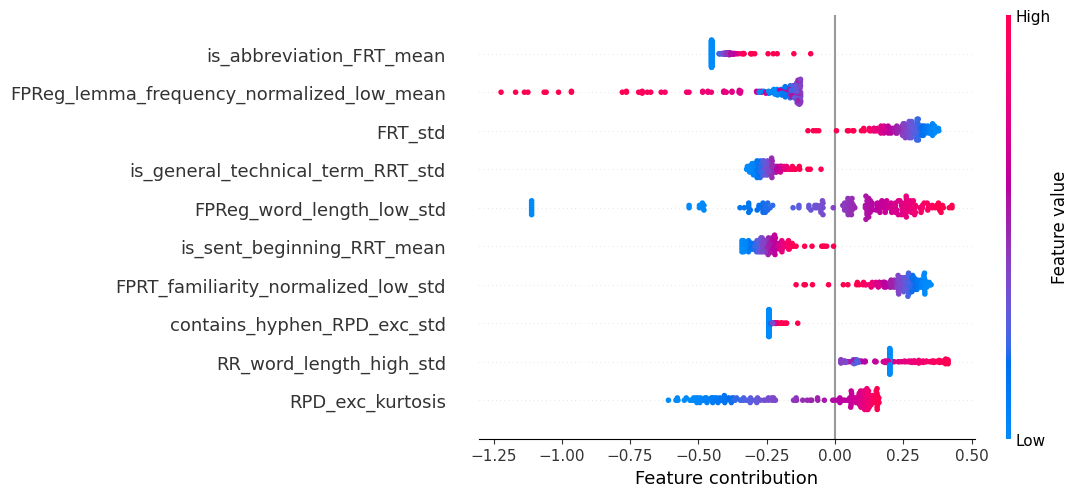

In [8]:
num_features = 10
use_feature_ids = np.argsort(np.sum(np.abs(np.transpose(test_feature_importances)), axis=0))[::-1][0:num_features]
explainer = shap.Explanation(values = np.transpose(test_feature_importances)[:,use_feature_ids], base_values=None, 
                           data=test_x[:,use_feature_ids],
                           display_data=None, instance_names=None, 
                           feature_names=feature_names[use_feature_ids], output_names=None, 
                           output_indexes=None, lower_bounds=None, upper_bounds=None, error_std=None, 
                           main_effects=None, hierarchical_values=None, clustering=None, compute_time=None)
shap.plots.beeswarm(explainer, max_display=num_features, show=False)
plt.xlabel(xlabel)
plt.savefig('plots/overall_feature_importance' + postfix.replace('.joblib','') + '_' + str(num_features) + '.pdf', dpi=300, bbox_inches='tight')

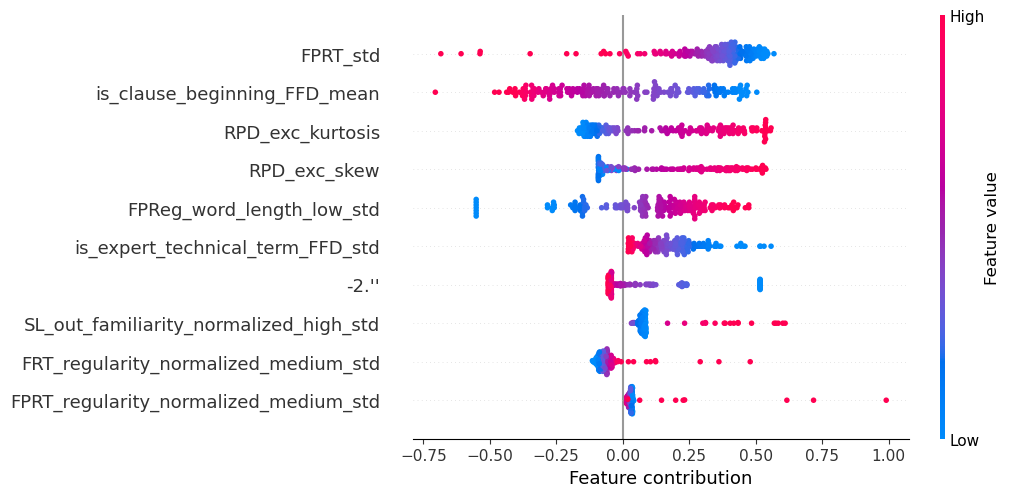

In [15]:
feature_importances_zero = np.transpose(test_feature_importances).copy()
feature_importances = np.transpose(test_feature_importances).copy()
zero_ids = np.where(feature_importances_zero < 0)
feature_importances_zero[zero_ids] = 0
use_feature_ids = np.argsort(np.max(np.abs(feature_importances_zero), axis=0))[::-1][0:num_features]
explainer = shap.Explanation(values = feature_importances[:,use_feature_ids], base_values=None, 
                           data=test_x[:,use_feature_ids],
                           display_data=None, instance_names=None, 
                           feature_names=feature_names[use_feature_ids], output_names=None, 
                           output_indexes=None, lower_bounds=None, upper_bounds=None, error_std=None, 
                           main_effects=None, hierarchical_values=None, clustering=None, compute_time=None)
shap.plots.beeswarm(explainer, max_display=num_features, show=False)
plt.xlabel(xlabel)
plt.savefig('plots/negative_feature_importance' + postfix.replace('.joblib','') + '.pdf', dpi=300, bbox_inches='tight')

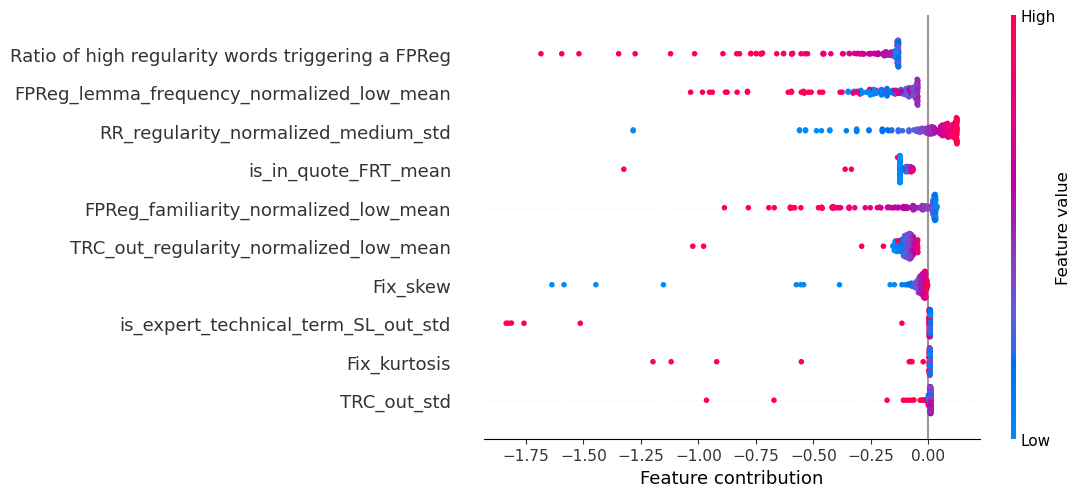

In [16]:
feature_importances_zero = np.transpose(test_feature_importances).copy()
feature_importances = np.transpose(test_feature_importances).copy()
zero_ids = np.where(feature_importances_zero > 0)
feature_importances_zero[zero_ids] = 0
use_feature_ids = np.argsort(np.max(np.abs(feature_importances_zero), axis=0))[::-1][0:num_features]
explainer = shap.Explanation(values = feature_importances[:,use_feature_ids], base_values=None, 
                           data=test_x[:,use_feature_ids],
                           display_data=None, instance_names=None, 
                           feature_names=feature_names[use_feature_ids], output_names=None, 
                           output_indexes=None, lower_bounds=None, upper_bounds=None, error_std=None, 
                           main_effects=None, hierarchical_values=None, clustering=None, compute_time=None)
shap.plots.beeswarm(explainer, max_display=num_features, show=False)
plt.xlabel(xlabel)
plt.savefig('plots/positive_feature_importance' + postfix.replace('.joblib','') + '.pdf', dpi=300, bbox_inches='tight')

## expert vs. non-expert

In [17]:
postfix = '_expert_cls_label.joblib'

In [18]:
feature_names = joblib.load('feature_names' + postfix)
test_x = joblib.load('test_x' + postfix) 
test_feature_importances = joblib.load('test_feature_importances' + postfix)

tmp_feature_names = []
for i in range(len(feature_names)):
    if features_name_potec[feature_names[i]] != '':
        tmp_feature_names.append(features_name_potec[feature_names[i]])
    else:
        tmp_feature_names.append(feature_names[i])
feature_names = np.array(tmp_feature_names)

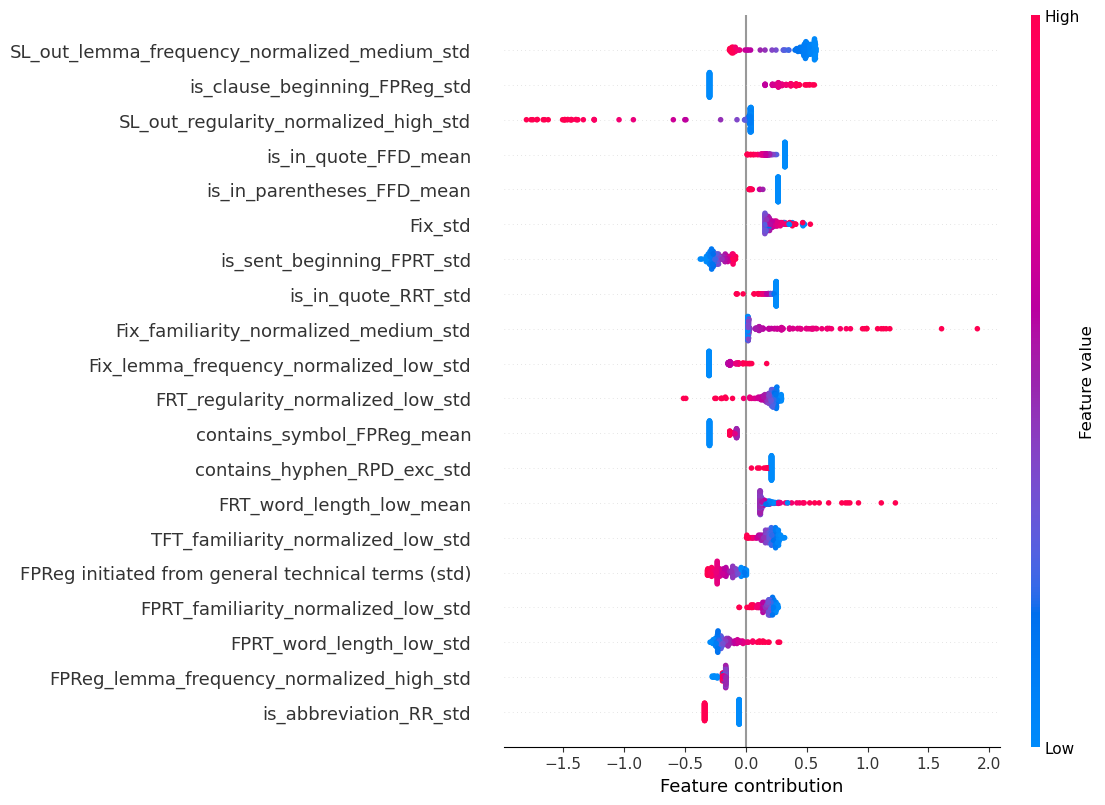

In [19]:
num_features = 20
use_feature_ids = np.argsort(np.sum(np.abs(np.transpose(test_feature_importances)), axis=0))[::-1][0:num_features]
explainer = shap.Explanation(values = np.transpose(test_feature_importances)[:,use_feature_ids], base_values=None, 
                           data=test_x[:,use_feature_ids],
                           display_data=None, instance_names=None, 
                           feature_names=feature_names[use_feature_ids], output_names=None, 
                           output_indexes=None, lower_bounds=None, upper_bounds=None, error_std=None, 
                           main_effects=None, hierarchical_values=None, clustering=None, compute_time=None)
shap.plots.beeswarm(explainer, max_display=num_features, show=False)
plt.xlabel(xlabel)
plt.savefig('plots/overall_feature_importance' + postfix.replace('.joblib','') + '_' + str(num_features) + '.pdf', dpi=300, bbox_inches='tight')

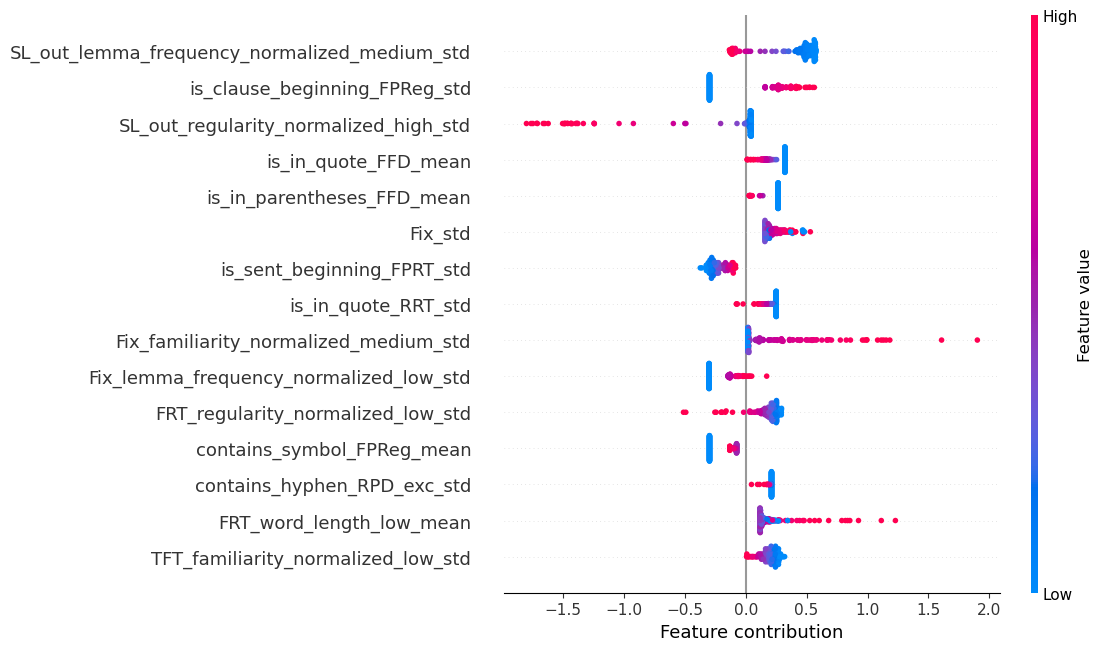

In [20]:
num_features = 15
use_feature_ids = np.argsort(np.sum(np.abs(np.transpose(test_feature_importances)), axis=0))[::-1][0:num_features]
explainer = shap.Explanation(values = np.transpose(test_feature_importances)[:,use_feature_ids], base_values=None, 
                           data=test_x[:,use_feature_ids],
                           display_data=None, instance_names=None, 
                           feature_names=feature_names[use_feature_ids], output_names=None, 
                           output_indexes=None, lower_bounds=None, upper_bounds=None, error_std=None, 
                           main_effects=None, hierarchical_values=None, clustering=None, compute_time=None)
shap.plots.beeswarm(explainer, max_display=num_features, show=False)
plt.xlabel(xlabel)
plt.savefig('plots/overall_feature_importance' + postfix.replace('.joblib','') + '_' + str(num_features) + '.pdf', dpi=300, bbox_inches='tight')

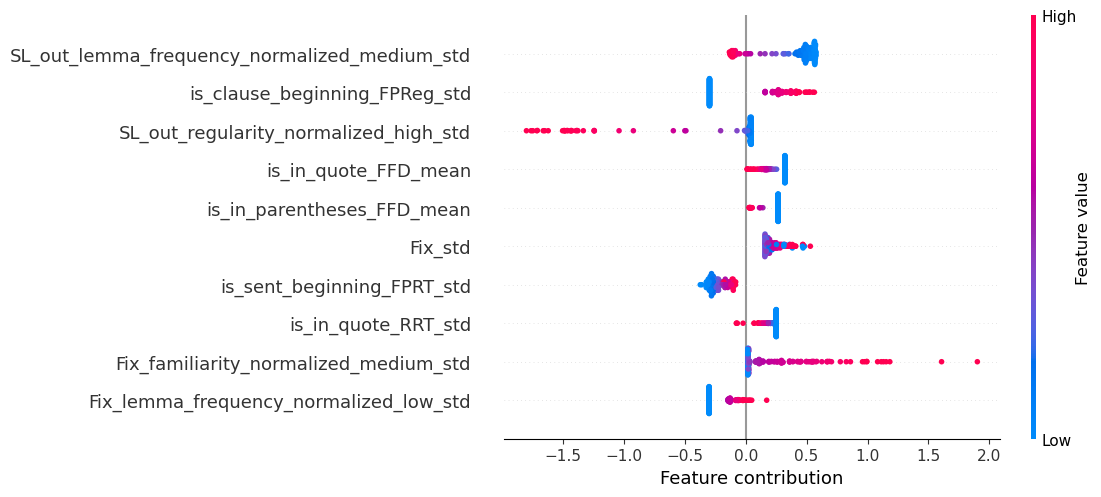

In [21]:
num_features = 10
use_feature_ids = np.argsort(np.sum(np.abs(np.transpose(test_feature_importances)), axis=0))[::-1][0:num_features]
explainer = shap.Explanation(values = np.transpose(test_feature_importances)[:,use_feature_ids], base_values=None, 
                           data=test_x[:,use_feature_ids],
                           display_data=None, instance_names=None, 
                           feature_names=feature_names[use_feature_ids], output_names=None, 
                           output_indexes=None, lower_bounds=None, upper_bounds=None, error_std=None, 
                           main_effects=None, hierarchical_values=None, clustering=None, compute_time=None)
shap.plots.beeswarm(explainer, max_display=num_features, show=False)
plt.xlabel(xlabel)
plt.savefig('plots/overall_feature_importance' + postfix.replace('.joblib','') + '_' + str(num_features) + '.pdf', dpi=300, bbox_inches='tight')

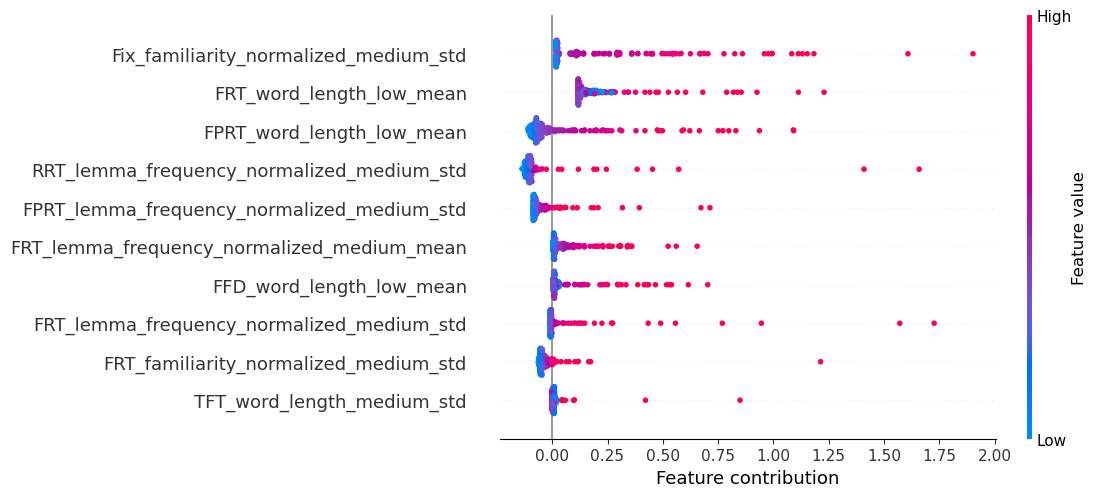

In [22]:
feature_importances_zero = np.transpose(test_feature_importances).copy()
feature_importances = np.transpose(test_feature_importances).copy()
zero_ids = np.where(feature_importances_zero < 0)
feature_importances_zero[zero_ids] = 0
use_feature_ids = np.argsort(np.max(np.abs(feature_importances_zero), axis=0))[::-1][0:num_features]
explainer = shap.Explanation(values = feature_importances[:,use_feature_ids], base_values=None, 
                           data=test_x[:,use_feature_ids],
                           display_data=None, instance_names=None, 
                           feature_names=feature_names[use_feature_ids], output_names=None, 
                           output_indexes=None, lower_bounds=None, upper_bounds=None, error_std=None, 
                           main_effects=None, hierarchical_values=None, clustering=None, compute_time=None)
shap.plots.beeswarm(explainer, max_display=num_features, show=False)
plt.xlabel(xlabel)
plt.savefig('plots/negative_feature_importance' + postfix.replace('.joblib','') + '.pdf', dpi=300, bbox_inches='tight')

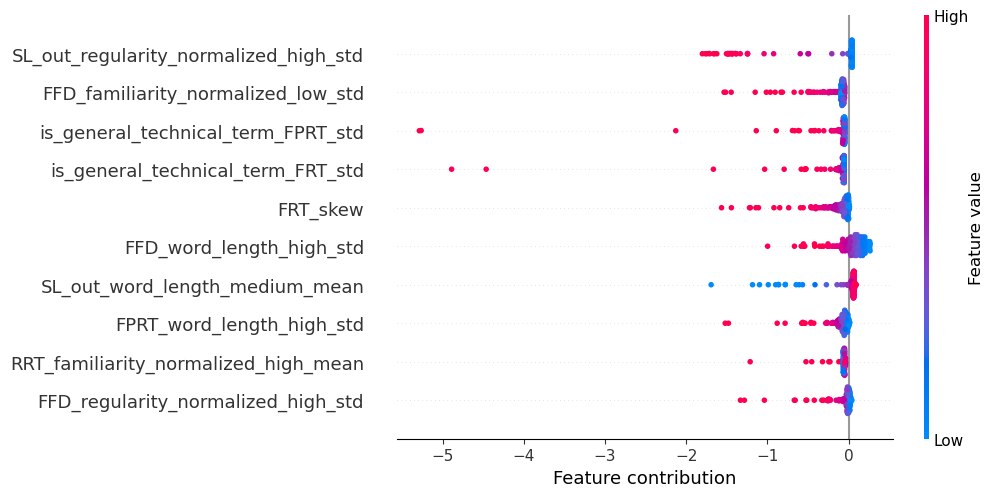

In [23]:
feature_importances_zero = np.transpose(test_feature_importances).copy()
feature_importances = np.transpose(test_feature_importances).copy()
zero_ids = np.where(feature_importances_zero > 0)
feature_importances_zero[zero_ids] = 0
use_feature_ids = np.argsort(np.max(np.abs(feature_importances_zero), axis=0))[::-1][0:num_features]
explainer = shap.Explanation(values = feature_importances[:,use_feature_ids], base_values=None, 
                           data=test_x[:,use_feature_ids],
                           display_data=None, instance_names=None, 
                           feature_names=feature_names[use_feature_ids], output_names=None, 
                           output_indexes=None, lower_bounds=None, upper_bounds=None, error_std=None, 
                           main_effects=None, hierarchical_values=None, clustering=None, compute_time=None)
shap.plots.beeswarm(explainer, max_display=num_features, show=False)
plt.xlabel(xlabel)
plt.savefig('plots/positive_feature_importance' + postfix.replace('.joblib','') + '.pdf', dpi=300, bbox_inches='tight')